<a href="https://colab.research.google.com/github/iamabdull/github/blob/master/Power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [2]:
from fbprophet import  Prophet

In [3]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [15]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('file_02.csv')

In [7]:
df.head(5)

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [8]:
df.dtypes

index                                     int64
Date                                     object
Region                                   object
Thermal Generation Actual (in MU)        object
Thermal Generation Estimated (in MU)     object
Nuclear Generation Actual (in MU)       float64
Nuclear Generation Estimated (in MU)    float64
Hydro Generation Actual (in MU)         float64
Hydro Generation Estimated (in MU)      float64
dtype: object

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.dtypes

index                                            int64
Date                                    datetime64[ns]
Region                                          object
Thermal Generation Actual (in MU)               object
Thermal Generation Estimated (in MU)            object
Nuclear Generation Actual (in MU)              float64
Nuclear Generation Estimated (in MU)           float64
Hydro Generation Actual (in MU)                float64
Hydro Generation Estimated (in MU)             float64
dtype: object

In [20]:
df1 = df.drop(["Thermal Generation Estimated (in MU)","Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)","Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)","index"], axis='columns')

In [22]:
 df1['Thermal Generation Actual (in MU)']=df1['Thermal Generation Actual (in MU)'].str.replace(',','')
 df1['Thermal Generation Actual (in MU)'] = df1['Thermal Generation Actual (in MU)'].apply(np.int64)

In [23]:
df1.dtypes

Date                                 datetime64[ns]
Region                                       object
Thermal Generation Actual (in MU)             int64
dtype: object

In [25]:
df1.shape

(4945, 3)

In [31]:
df2=df1.groupby(['Date'])['Region','Thermal Generation Actual (in MU)'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [32]:
df2

,Date,Thermal Generation Actual (in MU)
0,2017-09-01,277791
1,2017-09-02,277791
2,2017-09-03,277777
3,2017-09-04,277777
4,2017-09-05,279085
...,...,...
984,2020-07-28,296163
985,2020-07-29,296163
986,2020-07-30,297436
987,2020-07-31,298400


In [33]:
df3=df2.rename(columns={'Date':'ds','Thermal Generation Actual (in MU)':'y'})

In [35]:
m=Prophet()

In [36]:
model=m.fit(df3)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0}),
             ('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [45]:
future = model.make_future_dataframe(periods=180,freq='D')

In [46]:
future.tail()

,ds
1164,2021-01-24
1165,2021-01-25
1166,2021-01-26
1167,2021-01-27
1168,2021-01-28


In [47]:
prediction = model.predict(future)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-09-01,280079.092604,262275.135710,281212.813003,280079.092604,280079.092604,-8381.876711,-8381.876711,-8381.876711,-1066.666993,-1066.666993,-1066.666993,-7315.209718,-7315.209718,-7315.209718,0.0,0.0,0.0,271697.215893
1,2017-09-02,280145.781031,263716.638659,282434.891223,280145.781031,280145.781031,-6889.285469,-6889.285469,-6889.285469,-193.348753,-193.348753,-193.348753,-6695.936716,-6695.936716,-6695.936716,0.0,0.0,0.0,273256.495562
2,2017-09-03,280212.469459,265498.741736,282926.835318,280212.469459,280212.469459,-5955.181793,-5955.181793,-5955.181793,161.120443,161.120443,161.120443,-6116.302236,-6116.302236,-6116.302236,0.0,0.0,0.0,274257.287666
3,2017-09-04,280279.157886,265669.715325,284452.061117,280279.157886,280279.157886,-5308.738526,-5308.738526,-5308.738526,273.572121,273.572121,273.572121,-5582.310648,-5582.310648,-5582.310648,0.0,0.0,0.0,274970.419360
4,2017-09-05,280345.846314,266166.901140,283836.841244,280345.846314,280345.846314,-4713.648122,-4713.648122,-4713.648122,384.941952,384.941952,384.941952,-5098.590074,-5098.590074,-5098.590074,0.0,0.0,0.0,275632.198191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,2021-01-24,329974.730242,319189.003550,343837.360242,321192.312805,338631.926809,1779.535597,1779.535597,1779.535597,161.120443,161.120443,161.120443,1618.415154,1618.415154,1618.415154,0.0,0.0,0.0,331754.265840
1165,2021-01-25,330015.424002,319391.135243,344059.818827,321113.080377,338745.427047,1715.211250,1715.211250,1715.211250,273.572121,273.572121,273.572121,1441.639128,1441.639128,1441.639128,0.0,0.0,0.0,331730.635252
1166,2021-01-26,330056.117762,319665.648934,343605.713969,321066.841802,338854.849131,1633.646672,1633.646672,1633.646672,384.941952,384.941952,384.941952,1248.704720,1248.704720,1248.704720,0.0,0.0,0.0,331689.764433
1167,2021-01-27,330096.811521,318649.239701,344125.469298,321025.550927,338962.120916,1196.058780,1196.058780,1196.058780,153.415412,153.415412,153.415412,1042.643368,1042.643368,1042.643368,0.0,0.0,0.0,331292.870301


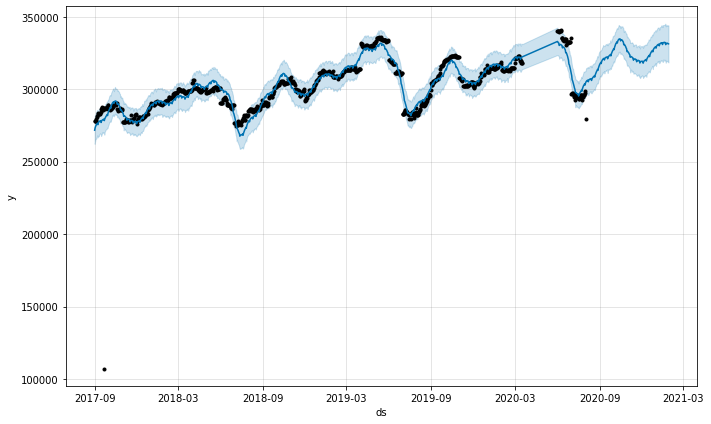

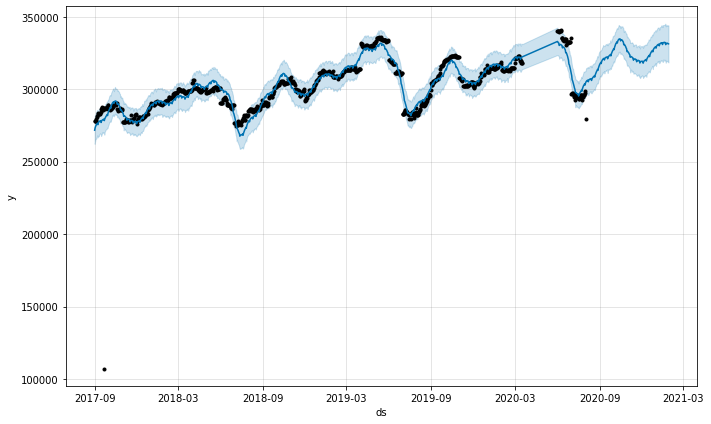

In [48]:
model.plot(prediction)